## 資料集說明

- **檔名**：`Social_Network_Ads.csv`
- **欄位**：
    - `Age`：年齡
    - `EstimatedSalary`：預估薪資
    - `Purchased`：是否購買（目標變數，0 或 1）

In [1]:
# 匯入資料及讀取資料
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [2]:
# 特徵與目標變數分離

x=df.drop(columns='Purchased')
y=df['Purchased']

In [3]:
# 資料切分為訓練及測試集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [4]:
# 特徵標準化 (Standard Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [13]:
# 設定紀錄容器, 分別用來存放不同 k 值下的訓練集與測試集錯誤率。
train_error = []
test_error = []

In [14]:
#迴圈計算不同k值, 然後紀錄不同k值的誤差

from sklearn.neighbors import KNeighborsClassifier

for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc,y_train)
    y_pred_train= knn.predict(X_train_sc)
    train_error.append(np.mean(y_train!= y_pred_train))
    y_pred_test= knn.predict(X_test_sc)
    test_error.append(np.mean(y_test!= y_pred_test))

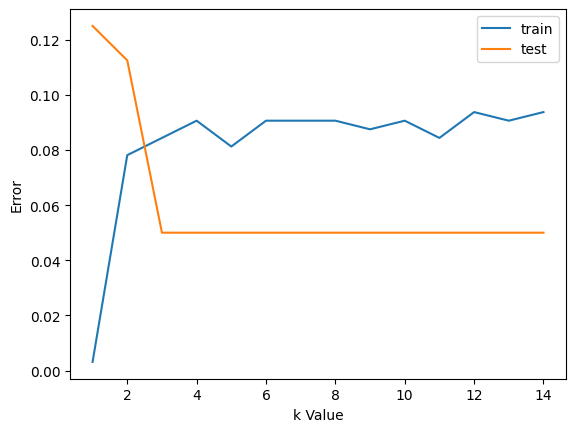

In [15]:
# 繪圖
plt.plot(range(1,15), train_error, label="train")
plt.plot(range(1,15), test_error, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [17]:
# 依上圖結果, 設定 k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
# 計算正確率
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test_sc)
accuracy_score(y_test,y_pred)

0.95